In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np 
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Neural networks imports

In [2]:
load_dotenv()

True

In [3]:
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
data = pd.read_csv('../Data/song_data(pop-artist).csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,id,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,92,0,2017-09-03,0.615,0.779,2,-6.454,1,0.06650,0.000000,0.1550,0.453,160.000,208198,4
1,1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,74,63,2017-09-08,0.687,0.845,7,-4.370,1,0.10000,0.000000,0.0452,0.809,87.972,190227,4
2,2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,87,78,2016-11-17,0.818,0.803,1,-4.282,1,0.03400,0.000000,0.1530,0.632,106.970,225983,4
3,3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,91,77,2017-03-03,0.624,0.876,9,-3.374,1,0.07350,0.000000,0.3270,0.781,99.943,170827,4
4,4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,91,83,2014-06-21,0.614,0.379,4,-10.480,1,0.60700,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,9918,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,82,0,1973-10-05,0.410,0.761,9,-8.507,0,0.01980,0.084700,0.2470,0.193,138.712,666572,4
9919,9919,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,67,52,1977-01-01,0.406,0.306,3,-10.482,1,0.31300,0.007900,0.0727,0.073,135.272,652560,4
9920,9920,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,59,45,1971-11-26,0.362,0.507,1,-11.229,1,0.01740,0.216000,0.1130,0.456,146.641,634440,3
9921,9921,6Ff77WXC58MkhLE5A1qgY1,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,69,0,1976-12-10,0.331,0.733,2,-8.671,1,0.08870,0.001740,0.9470,0.380,128.512,620747,4


In [5]:
df.shape

(9923, 19)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'all_artists', 'popularity_artist',
       'popularity_song', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
pd.DataFrame(df.dtypes, columns=['DataType'])


,DataType
Unnamed: 0,int64
id,object
title,object
all_artists,object
popularity_artist,int64
popularity_song,int64
release_date,object
danceability,float64
energy,float64
key,int64


In [8]:
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [9]:
df[features].describe()


,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
count,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000
mean,0.567848,0.651812,-7.690813,0.238747,0.099163,0.185044,0.473066,120.464278
std,0.166108,0.225230,4.440603,0.290962,0.246018,0.153921,0.248849,28.203097
min,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467000,0.510000,-9.155000,0.015700,0.000000,0.094000,0.275000,99.960000
50%,0.581000,0.696000,-6.510000,0.096600,0.000034,0.122000,0.468000,119.972000
75%,0.686000,0.829000,-4.882000,0.383000,0.008910,0.227000,0.670000,138.013000
max,0.980000,1.000000,-0.276000,0.995000,0.999000,0.988000,0.990000,240.107000


In [10]:
df.sort_values(by='popularity_song', ascending=False).head()


,Unnamed: 0,id,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1016,1016,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,83,88,2013-04-19,0.612,0.807,10,-2.810,1,0.04950,0.017700,0.101,0.398,124.053,240400,4
3294,3294,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Khalid,87,86,2018-04-19,0.351,0.296,4,-10.109,0,0.93400,0.000000,0.095,0.120,115.284,200186,4
9156,9156,7lQ8MOhq6IN2w8EYcFNSUk,Without Me,Eminem,89,86,2002-05-26,0.908,0.669,7,-2.827,1,0.00286,0.000000,0.237,0.662,112.238,290320,4
2575,2575,3AJwUDP919kvQ9QcozQPxg,Yellow,Coldplay,86,86,2000-07-10,0.429,0.661,11,-7.227,1,0.00239,0.000121,0.234,0.285,173.372,266773,4
136,136,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,87,85,2012-12-07,0.726,0.698,5,-4.165,1,0.04900,0.000000,0.309,0.867,143.994,233478,4


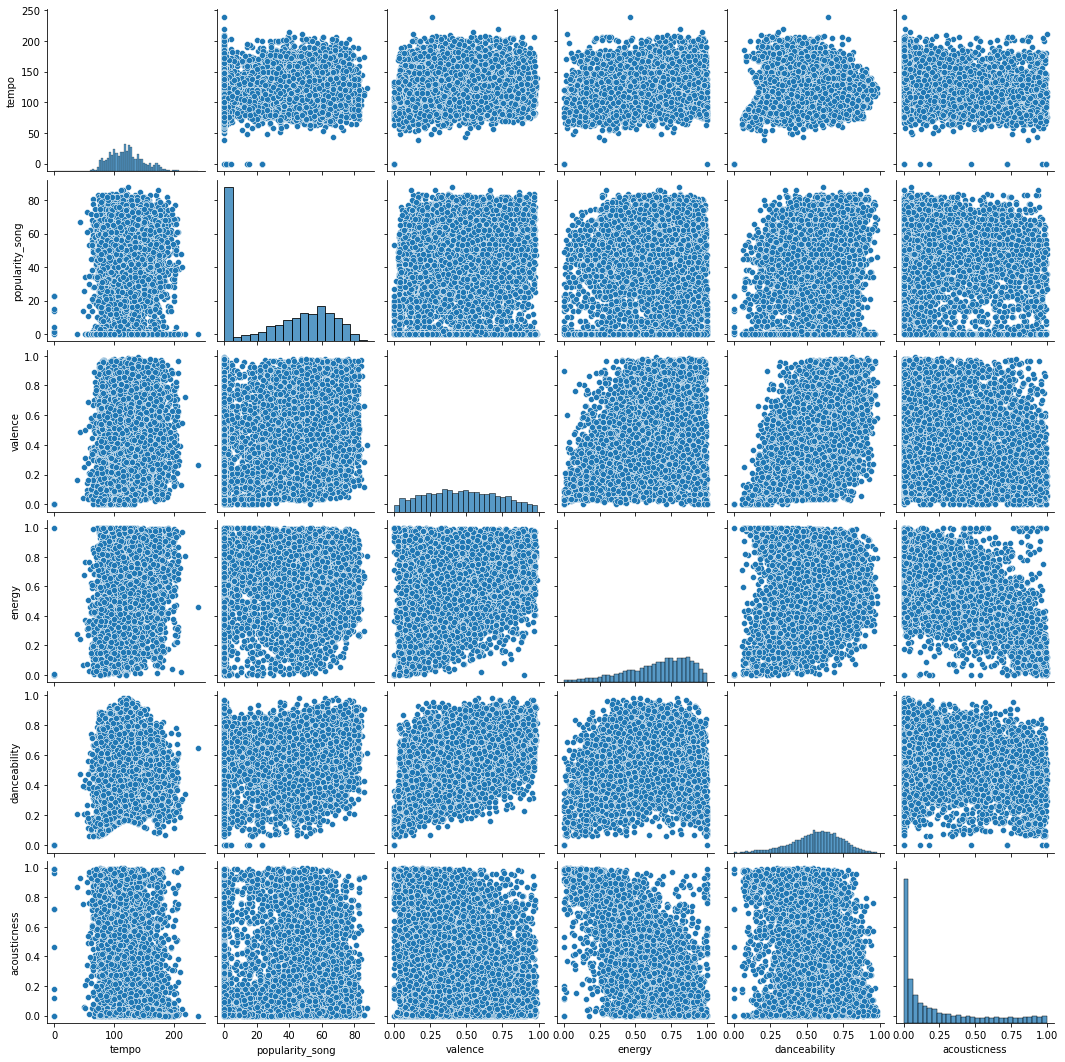

In [11]:
sns.pairplot(df, vars=['tempo', 'popularity_song', 'valence', 'energy', 'danceability', 'acousticness'])

In [12]:
pd.isnull(df).sum()

Unnamed: 0           0
id                   0
title                0
all_artists          0
popularity_artist    0
popularity_song      0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

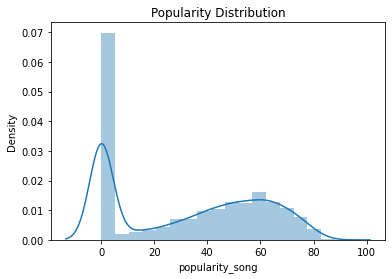

In [13]:
# Popularity distribution plot
sns.distplot(data['popularity_song']).set_title('Popularity Distribution')


<AxesSubplot:xlabel='key', ylabel='popularity_song'>

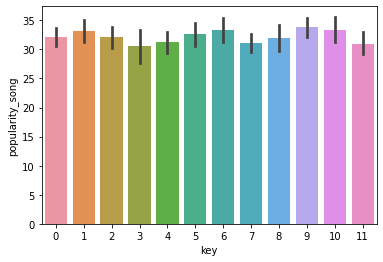

In [14]:
# all keys are encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on.
sns.barplot(x = 'key', y = 'popularity_song', data = df)

<AxesSubplot:xlabel='mode', ylabel='popularity_song'>

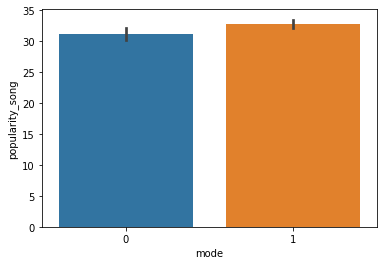

In [15]:
# 0 mode = minor, 1 mode = major
sns.barplot(x = 'mode', y = 'popularity_song', data = df)

<AxesSubplot:xlabel='mode', ylabel='popularity_song'>

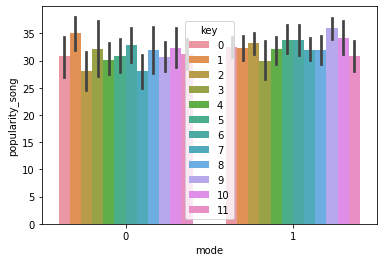

In [16]:
# Combining Key and mode against popularity.
sns.barplot(x = 'mode', y = 'popularity_song', hue = 'key', data = df)


In [17]:
# Changing duration to minutes instead of milliseconds
df['duration_m'] = df['duration_ms']/60000
df = data.reindex(sorted(df.columns), axis=1)
df.head()

,Unnamed: 0,acousticness,all_artists,danceability,duration_m,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,popularity_artist,popularity_song,release_date,tempo,time_signature,title,valence
0,0,0.0665,Taylor Swift,0.615,3.469967,208198,0.779,7zgqtptZvhf8GEmdsM2vp2,0.000000,2,0.1550,-6.454,1,92,0,2017-09-03,160.000,4,...Ready For It?,0.453
1,1,0.1000,Thomas Rhett,0.687,3.170450,190227,0.845,4Vxu50qVrQcycjRyJQaZLC,0.000000,7,0.0452,-4.370,1,74,63,2017-09-08,87.972,4,Life Changes,0.809
2,2,0.0340,Bruno Mars,0.818,3.766383,225983,0.803,6b8Be6ljOzmkOmFslEb23P,0.000000,1,0.1530,-4.282,1,87,78,2016-11-17,106.970,4,24K Magic,0.632
3,3,0.0735,Ed Sheeran,0.624,2.847117,170827,0.876,0afhq8XCExXpqazXczTSve,0.000000,9,0.3270,-3.374,1,91,77,2017-03-03,99.943,4,Galway Girl,0.781
4,4,0.6070,Ed Sheeran,0.614,4.316450,258987,0.379,1HNkqx9Ahdgi1Ixy2xkKkL,0.000464,4,0.0986,-10.480,1,91,83,2014-06-21,107.989,4,Photograph,0.201


In [18]:
data.drop('duration_ms', axis = 1, inplace = True)


In [19]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  acousticness   all_artists  danceability  duration_m  \
0              0       0.06650  Taylor Swift         0.615    3.469967   
1              1       0.10000  Thomas Rhett         0.687    3.170450   
2              2       0.03400    Bruno Mars         0.818    3.766383   
3              3       0.07350    Ed Sheeran         0.624    2.847117   
4              4       0.60700    Ed Sheeran         0.614    4.316450   
...          ...           ...           ...           ...         ...   
9918        9918       0.01980    Elton John         0.410   11.109533   
9919        9919       0.31300    Supertramp         0.406   10.876000   
9920        9920       0.01740           Yes         0.362   10.574000   
9921        9921       0.08870         Wings         0.331   10.345783   
9922        9922       0.00106   The Killers         0.342    3.701783   

      duration_ms  energy                      id  instrumentalness  key  \
0

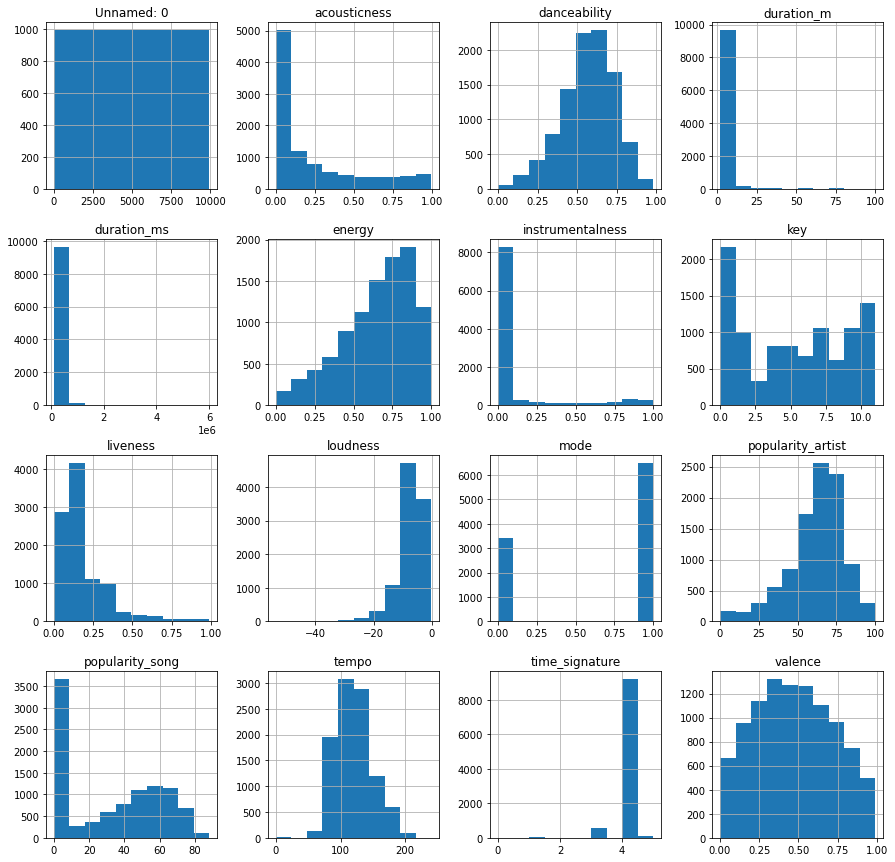

In [20]:
df.hist(figsize=(15, 15))
plt.show()

<AxesSubplot:>

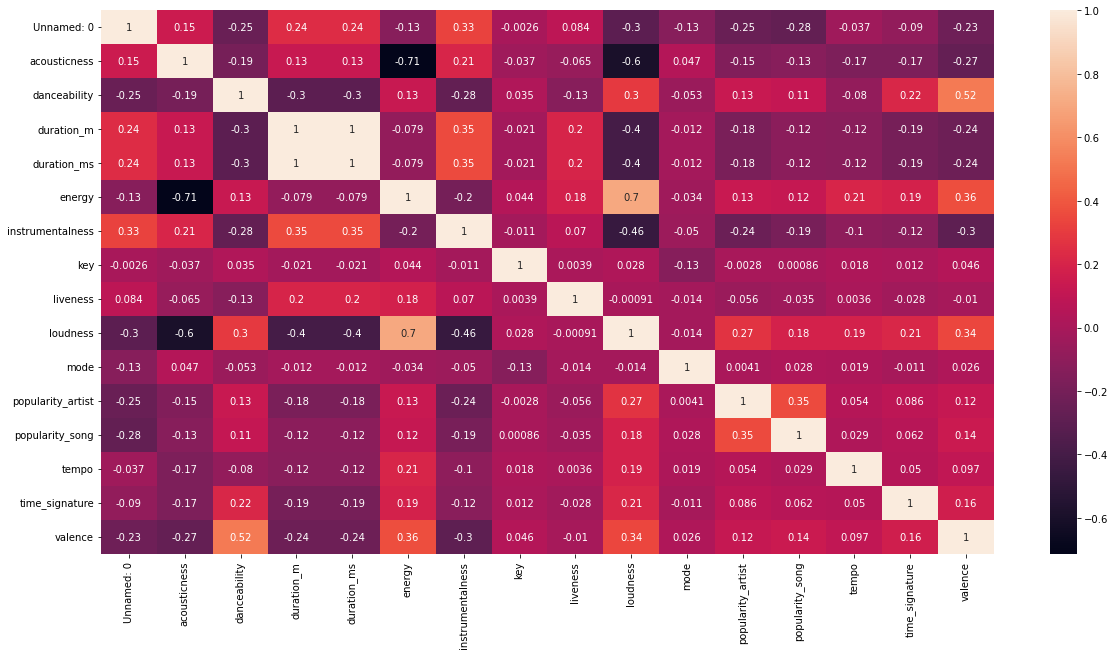

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

## What does this tell us about the songs?

Going back to our hypothesis, predicting a hit song based on certain features. The above visualization highlight the the most relevant features based on popularity of the songs.
Stand out features are:
* Energy
* Danceability
* Loudness
* Acousticness
* Valence

In [22]:

# Drop Unecessary columns
df_nn = df.drop(['popularity_artist', 'Unnamed: 0','id', 'duration_ms'], axis = 1)
df_nn.head()

,acousticness,all_artists,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,popularity_song,release_date,tempo,time_signature,title,valence
0,0.0665,Taylor Swift,0.615,3.469967,0.779,0.000000,2,0.1550,-6.454,1,0,2017-09-03,160.000,4,...Ready For It?,0.453
1,0.1000,Thomas Rhett,0.687,3.170450,0.845,0.000000,7,0.0452,-4.370,1,63,2017-09-08,87.972,4,Life Changes,0.809
2,0.0340,Bruno Mars,0.818,3.766383,0.803,0.000000,1,0.1530,-4.282,1,78,2016-11-17,106.970,4,24K Magic,0.632
3,0.0735,Ed Sheeran,0.624,2.847117,0.876,0.000000,9,0.3270,-3.374,1,77,2017-03-03,99.943,4,Galway Girl,0.781
4,0.6070,Ed Sheeran,0.614,4.316450,0.379,0.000464,4,0.0986,-10.480,1,83,2014-06-21,107.989,4,Photograph,0.201


In [23]:
# Get dummy variables for categorical variables
df_nn = pd.get_dummies(df_nn, columns=['time_signature', 'key', 'mode'], drop_first=True)
df_nn.head()

,acousticness,all_artists,danceability,duration_m,energy,instrumentalness,liveness,loudness,popularity_song,release_date,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.0665,Taylor Swift,0.615,3.469967,0.779,0.000000,0.1550,-6.454,0,2017-09-03,...,0,0,0,0,0,0,0,0,0,1
1,0.1000,Thomas Rhett,0.687,3.170450,0.845,0.000000,0.0452,-4.370,63,2017-09-08,...,0,0,0,0,1,0,0,0,0,1
2,0.0340,Bruno Mars,0.818,3.766383,0.803,0.000000,0.1530,-4.282,78,2016-11-17,...,0,0,0,0,0,0,0,0,0,1
3,0.0735,Ed Sheeran,0.624,2.847117,0.876,0.000000,0.3270,-3.374,77,2017-03-03,...,0,0,0,0,0,0,1,0,0,1
4,0.6070,Ed Sheeran,0.614,4.316450,0.379,0.000464,0.0986,-10.480,83,2014-06-21,...,0,1,0,0,0,0,0,0,0,1


In [24]:
features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness", 
            "mode_1", "loudness", "tempo", "time_signature_1", "time_signature_3", "time_signature_4", "time_signature_5", "valence"]
features

['acousticness',
 'danceability',
 'duration_m',
 'energy',
 'instrumentalness',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'liveness',
 'mode_1',
 'loudness',
 'tempo',
 'time_signature_1',
 'time_signature_3',
 'time_signature_4',
 'time_signature_5',
 'valence']

In [25]:
df_nn.describe()

,acousticness,danceability,duration_m,energy,instrumentalness,liveness,loudness,popularity_song,tempo,valence,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
count,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,...,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000
mean,0.238747,0.567848,4.723640,0.651812,0.099163,0.185044,-7.690813,32.269273,120.464278,0.473066,...,0.033659,0.081729,0.081729,0.067419,0.106923,0.062078,0.106419,0.059659,0.081024,0.654439
std,0.290962,0.166108,6.157106,0.225230,0.246018,0.153921,4.440603,27.932006,28.203097,0.248849,...,0.180359,0.273966,0.273966,0.250759,0.309031,0.241309,0.308389,0.236867,0.272886,0.475575
min,0.000000,0.000000,1.669533,0.000000,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015700,0.467000,3.298883,0.510000,0.000000,0.094000,-9.155000,0.000000,99.960000,0.275000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.096600,0.581000,3.747900,0.696000,0.000034,0.122000,-6.510000,36.000000,119.972000,0.468000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.383000,0.686000,4.390225,0.829000,0.008910,0.227000,-4.882000,58.000000,138.013000,0.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.995000,0.980000,100.011017,1.000000,0.999000,0.988000,-0.276000,88.000000,240.107000,0.990000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Assign 1 to all songs with a popularity of > 57 and 0 to all songs with a popularity of <= 57
df_nn['popularity_song'] = df_nn['popularity_song'].apply(lambda x: 1 if x > 57 else 0)
df_nn.head()

,acousticness,all_artists,danceability,duration_m,energy,instrumentalness,liveness,loudness,popularity_song,release_date,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.0665,Taylor Swift,0.615,3.469967,0.779,0.000000,0.1550,-6.454,0,2017-09-03,...,0,0,0,0,0,0,0,0,0,1
1,0.1000,Thomas Rhett,0.687,3.170450,0.845,0.000000,0.0452,-4.370,1,2017-09-08,...,0,0,0,0,1,0,0,0,0,1
2,0.0340,Bruno Mars,0.818,3.766383,0.803,0.000000,0.1530,-4.282,1,2016-11-17,...,0,0,0,0,0,0,0,0,0,1
3,0.0735,Ed Sheeran,0.624,2.847117,0.876,0.000000,0.3270,-3.374,1,2017-03-03,...,0,0,0,0,0,0,1,0,0,1
4,0.6070,Ed Sheeran,0.614,4.316450,0.379,0.000464,0.0986,-10.480,1,2014-06-21,...,0,1,0,0,0,0,0,0,0,1


# Data Preprocessing

In [27]:
# Creating the X and y sets
X = df_nn[features]
y = df_nn['popularity_song']

In [28]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10)

In [29]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Build Deep Learning Model

In [30]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = int(number_input_features * 1.5)
hidden_nodes_layer2 = int(number_input_features * 0.5)

print(number_input_features, hidden_nodes_layer1, hidden_nodes_layer2)

25 37 12


In [32]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

2022-06-05 20:36:29.718640: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
# Compile the model
import tensorflow as tf
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [34]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                962       
                                                                 
 dense_1 (Dense)             (None, 12)                456       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Training the model
batch_size = 100
epochs = 1000
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/1000
56/56 [==============================] - 2s 14ms/step - loss: 0.5789 - accuracy: 0.7345 - tp: 46.0000 - tn: 4053.0000 - fp: 140.0000 - fn: 1342.0000 - precision: 0.2473 - recall: 0.0331 - auc: 0.5555 - val_loss: 2.8598 - val_accuracy: 0.7464 - val_tp: 0.0000e+00 - val_tn: 1389.0000 - val_fp: 0.0000e+00 - val_fn: 472.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7511 - tp: 1.0000 - tn: 4191.0000 - fp: 2.0000 - fn: 1387.0000 - precision: 0.3333 - recall: 7.2046e-04 - auc: 0.6116 - val_loss: 4.2586 - val_accuracy: 0.7464 - val_tp: 0.0000e+00 - val_tn: 1389.0000 - val_fp: 0.0000e+00 - val_fn: 472.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7515 - tp: 1.0000 - tn: 4193.0000 - fp: 0.0000e+00 - fn: 1387.0000 - precision: 1.0000 - re

<AxesSubplot:title={'center':'Loss'}, xlabel='Epoch'>

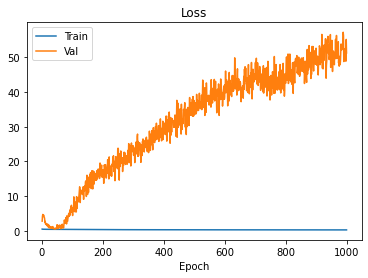

In [36]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<AxesSubplot:title={'center':'Accuracy'}, xlabel='Epoch'>

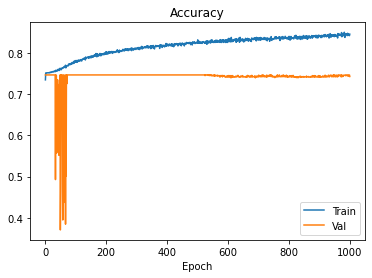

In [37]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<AxesSubplot:title={'center':'AUC'}, xlabel='Epoch'>

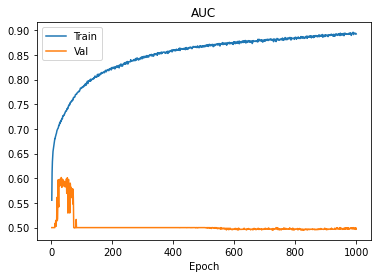

In [38]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [39]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 52.37834930419922,
 'accuracy': 0.7416364550590515,
 'tp': 0.0,
 'tn': 1840.0,
 'fp': 9.0,
 'fn': 632.0,
 'precision': 0.0,
 'recall': 0.0,
 'auc': 0.49756625294685364}

In [40]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=0.0,FN=9.0
Negative(0),FP=632.0,TN=1840.0


In [41]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = (model.predict(X_test) > 0.5).astype("int32")

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2472
           1       0.00      0.00      0.00         9

    accuracy                           0.74      2481
   macro avg       0.50      0.37      0.43      2481
weighted avg       0.99      0.74      0.85      2481

